<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NLP-EDA-Notebook" data-toc-modified-id="NLP-EDA-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NLP EDA Notebook</a></span><ul class="toc-item"><li><span><a href="#Filling-Nulls-(again)" data-toc-modified-id="Filling-Nulls-(again)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Filling Nulls (again)</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Generate-Sentiment-Scores" data-toc-modified-id="Generate-Sentiment-Scores-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Generate Sentiment Scores</a></span></li><li><span><a href="#Inspecting-Sentiment-Scores" data-toc-modified-id="Inspecting-Sentiment-Scores-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Inspecting Sentiment Scores</a></span><ul class="toc-item"><li><span><a href="#Graphing-Answers-Sentiment-Scores" data-toc-modified-id="Graphing-Answers-Sentiment-Scores-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Graphing Answers Sentiment Scores</a></span></li><li><span><a href="#Graphing-Questions-Sentiment-Scores" data-toc-modified-id="Graphing-Questions-Sentiment-Scores-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Graphing Questions Sentiment Scores</a></span></li><li><span><a href="#Graphing-the-Distribution-Scores-from-the-Questions" data-toc-modified-id="Graphing-the-Distribution-Scores-from-the-Questions-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Graphing the Distribution Scores from the Questions</a></span></li><li><span><a href="#Graphing-the-Distribution-of-the-Scores-from-Answers" data-toc-modified-id="Graphing-the-Distribution-of-the-Scores-from-Answers-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Graphing the Distribution of the Scores from Answers</a></span></li><li><span><a href="#Checking-the-distribution-of-answers-that-were-and-were-not-answered" data-toc-modified-id="Checking-the-distribution-of-answers-that-were-and-were-not-answered-1.2.2.5"><span class="toc-item-num">1.2.2.5&nbsp;&nbsp;</span>Checking the distribution of answers that were and were not answered</a></span></li></ul></li></ul></li><li><span><a href="#Viewing-the-correlation-of-the-numeric-columns-to-was_answered" data-toc-modified-id="Viewing-the-correlation-of-the-numeric-columns-to-was_answered-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Viewing the correlation of the numeric columns to <code>was_answered</code></a></span></li><li><span><a href="#Tokenizing" data-toc-modified-id="Tokenizing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Tokenizing</a></span><ul class="toc-item"><li><span><a href="#Tokenizing-text_cols" data-toc-modified-id="Tokenizing-text_cols-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Tokenizing <code>text_cols</code></a></span></li></ul></li><li><span><a href="#Creating-a-CountVectorizer-Function-[not-used]" data-toc-modified-id="Creating-a-CountVectorizer-Function-[not-used]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Creating a CountVectorizer Function [not used]</a></span></li><li><span><a href="#Exporting-Data" data-toc-modified-id="Exporting-Data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exporting Data</a></span></li></ul></li></ul></div>

# NLP EDA Notebook

#TODO : write a short summary of what is contained in this notebook

In [1]:
# import standard toolset
import pandas as pd
# import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction import _stop_words, text

%config InlineBackend.figure_format = 'retina'


In [2]:
data = pd.read_csv('./Datasets/cleaned.csv')
data.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,answers_author_id,answers_date_added,answers_body,answers_score,was_answered,has_tag
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1


In [3]:
data.describe()

,questions_score,tag_id,answers_score,was_answered,has_tag
count,180376.000000,180376.000000,180376.000000,180376.000000,180376.000000
mean,4.873115,16850.235325,0.448413,0.987027,0.990575
std,7.536732,10280.952759,0.936107,0.113158,0.096623
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9521.000000,0.000000,1.000000,1.000000
50%,4.000000,18351.000000,0.000000,1.000000,1.000000
75%,5.000000,25524.000000,1.000000,1.000000,1.000000
max,125.000000,39250.000000,30.000000,1.000000,1.000000


In [4]:
data.shape

(180376, 15)

In [5]:
data.dtypes

questions_id             object
questions_author_id      object
questions_date_added     object
questions_title          object
questions_body           object
questions_score         float64
tag_id                  float64
tag_name                 object
answers_id               object
answers_author_id        object
answers_date_added       object
answers_body             object
answers_score           float64
was_answered              int64
has_tag                   int64
dtype: object

In [6]:
data.groupby('was_answered').mean(numeric_only = True)

,questions_score,tag_id,answers_score,has_tag
was_answered,,,,
0,0.755556,19804.312393,0.000000,0.994017
1,4.927234,16811.408681,0.454307,0.990530


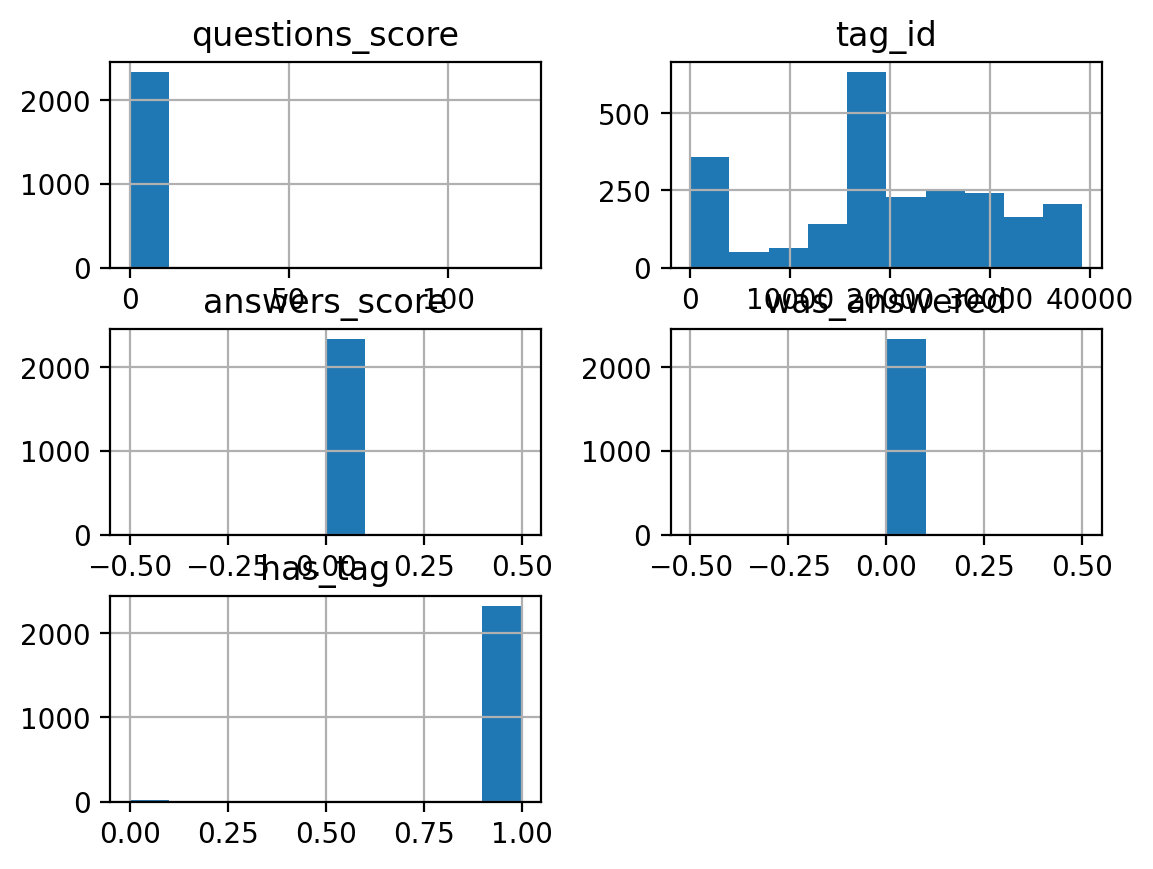

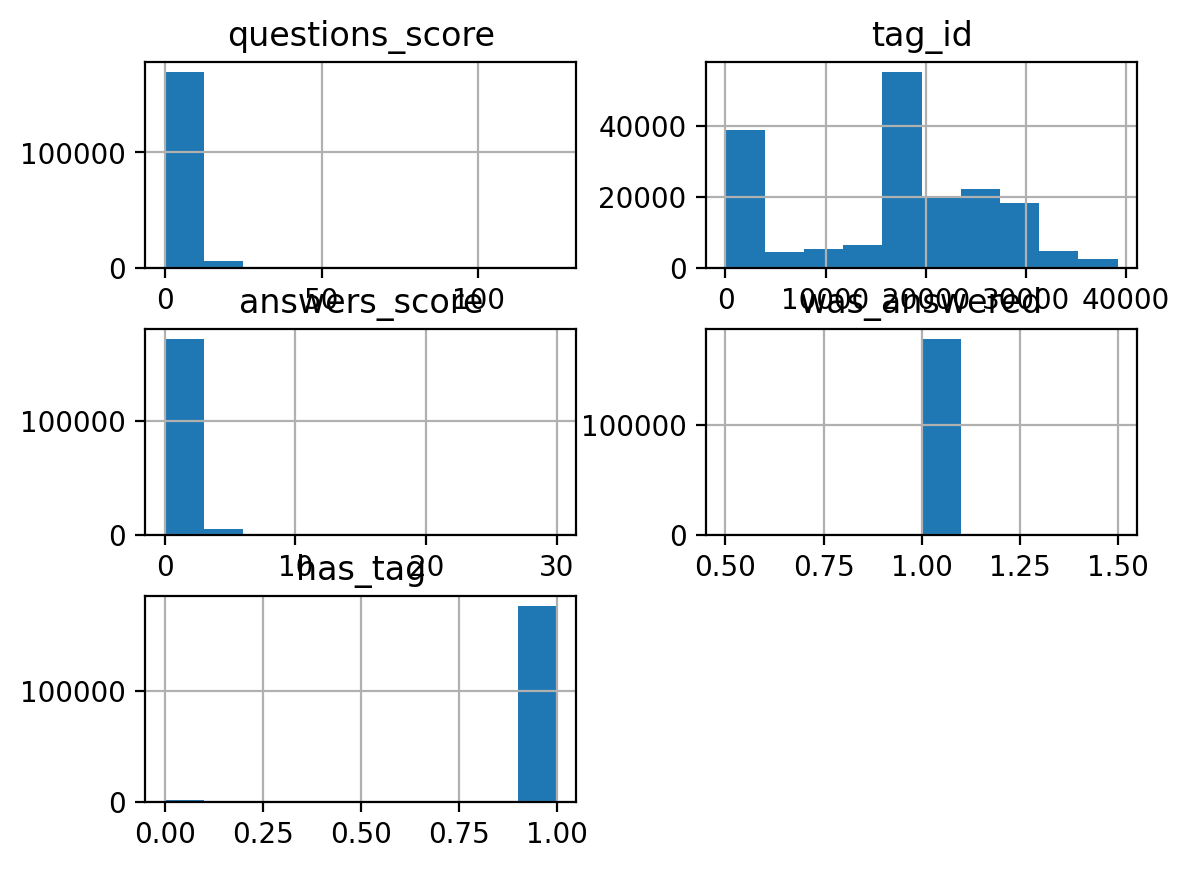

In [7]:
data.groupby('was_answered').hist();

## Filling Nulls (again)

During the cleaning step to prepare for the NLP analysis, additional null values were introduced into the `answers_body` column. This is likely an artifact of exporting to a csv file and then re-imporing again, where blank spaces are considered "null". In the cleaning step we replaced all non-alphabetical characters in the answer bodies with a blank space, and for an answer strictly composed of these non-alphabetical characters the only remaining text would be " ". Additional evidence of this is that the number of unique `answers_body` has decreased as well - dropping from 50402 to 50356 (as shown below).

In order to deal with these new nulls, we will fill them again with "none".

In [8]:
data.isnull().sum()

questions_id               0
questions_author_id        0
questions_date_added       0
questions_title            0
questions_body             0
questions_score            0
tag_id                     0
tag_name                   0
answers_id                 0
answers_author_id          0
answers_date_added      2340
answers_body              24
answers_score              0
was_answered               0
has_tag                    0
dtype: int64

In [9]:
data['answers_body'].nunique()

50356

In [10]:
data['answers_body'].fillna("none", inplace=True)

For context, understanding the number of "none" values in each column:

In [11]:
temp = data == "none";
temp.sum()

questions_id               0
questions_author_id        0
questions_date_added       0
questions_title            0
questions_body             0
questions_score            0
tag_id                     0
tag_name                1702
answers_id              2340
answers_author_id       2340
answers_date_added         0
answers_body            2368
answers_score              0
was_answered               0
has_tag                    0
dtype: int64

## Sentiment Analysis

1. How does the sentiment of the question affect its likelihood of being answered?
2. How does the sentiment of the answer affect the score the answer receives?

In order to delve into these two questions we use NLTK's Sentiment Intensity Analyzer to get the sentiment score of  `questions_body` and  `answers_body`. Scores range from -1 to 1, with 1 being positive and -1 being negative. An example of positive words would be "like", "love", "appreciate" while negative words would be "hate", "dislike", "frustrated" etc.

### Generate Sentiment Scores

**Instantiating SentimentIntensityAnalyzer() and Creating a Function get_compound_sentiment()**

When called, it calculates the sentiment score for each row in the passed columns

In [12]:
sia = SentimentIntensityAnalyzer()

def get_compound_sentiment(post):
    return sia.polarity_scores(post)['compound']

**Creating columns with sentiment scores**

Produced by mapping the answers from the get_compount_sentiment() function

In [13]:
data['questions_sentiment'] = data['questions_body'].apply(get_compound_sentiment)
data['answers_sentiment'] = data['answers_body'].apply(get_compound_sentiment)

**Export the data**

This will make it faster to re-use the data set for analysis in the future.

In [14]:
data.to_csv('./Datasets/cleaned_w_sentiment_raw.csv', index=False)

### Inspecting Sentiment Scores

#### Graphing Answers Sentiment Scores

To get an idea of the distrition of Sentiment Scores, we're plotting a histogram with Count on the y-axis and sentiment score on the x-axis

In [2]:
#Read in te data
data = pd.read_csv('./Datasets/cleaned_w_sentiment_raw.csv')

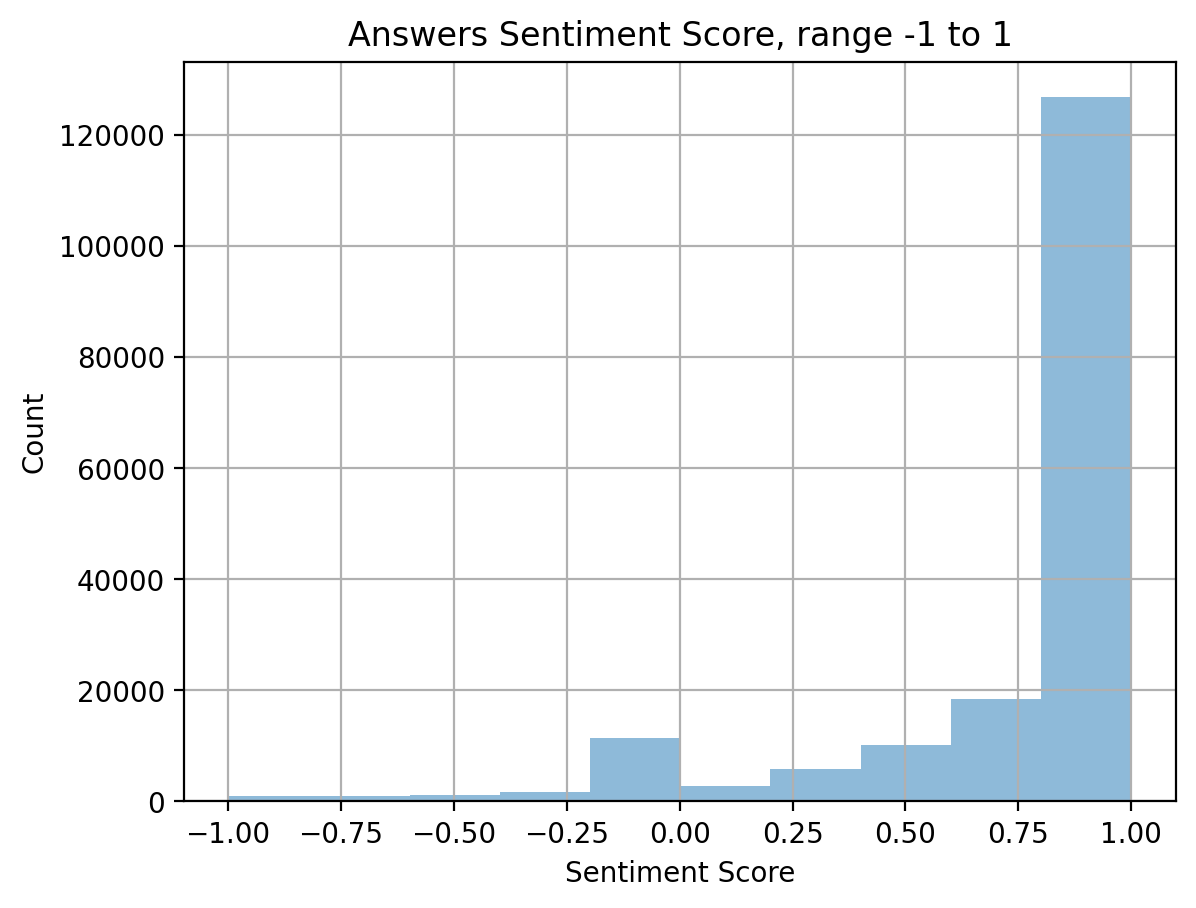

In [13]:
#Overall
data['answers_sentiment'].hist(alpha=.5)
plt.title('Answers Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#### Graphing Questions Sentiment Scores

We also included on the graph the number of questions that were and were not answered

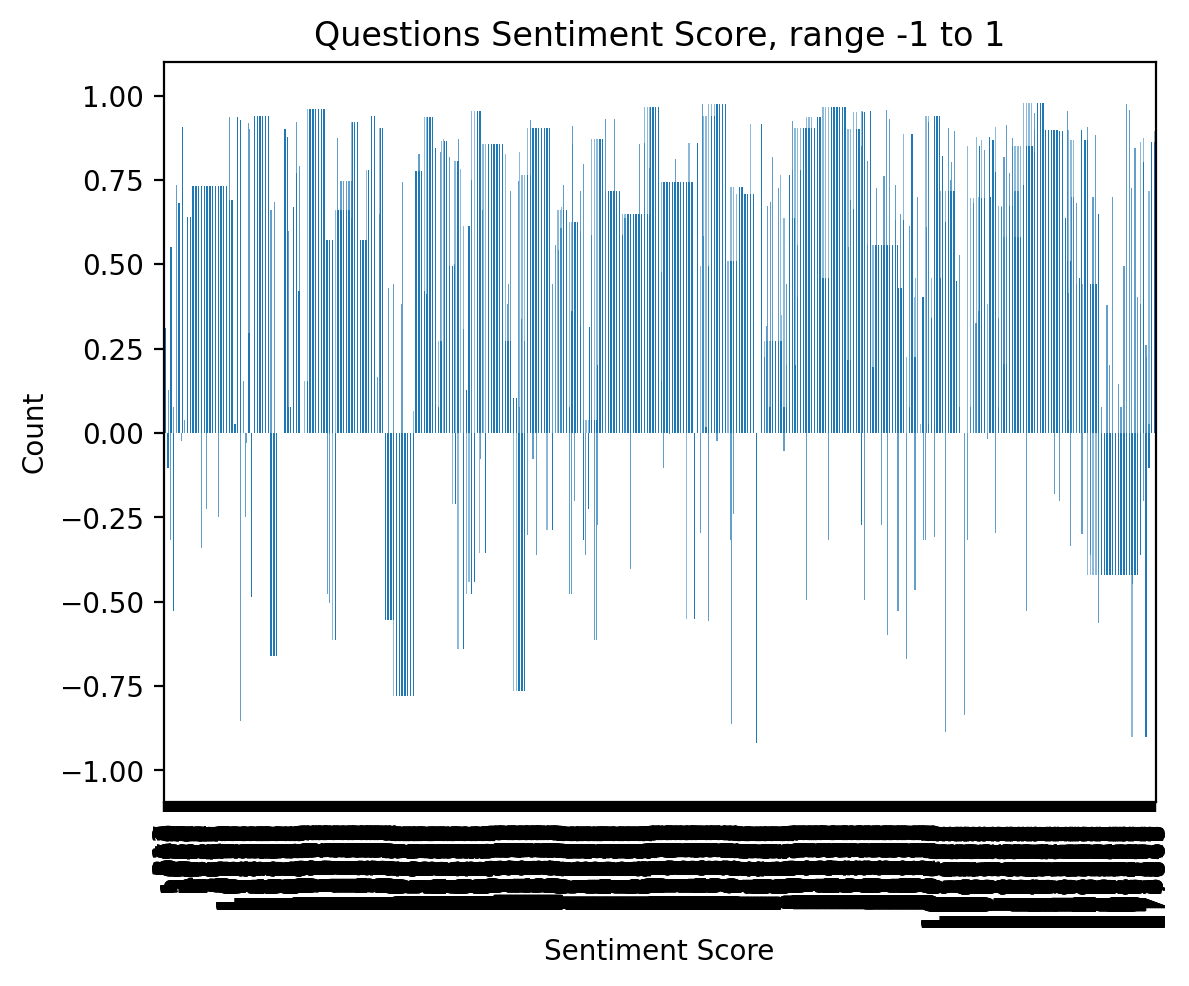

In [4]:
data['questions_sentiment'].plot(kind = 'bar', label="all");
plt.title('Questions Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#was answered
data[data['was_answered'] == 1]['questions_sentiment'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['was_answered'] == 0]['questions_sentiment'].plot(kind = 'bar', alpha = .7, label='not answered');
# plt.legend();

#### Graphing the Distribution Scores from the Questions 

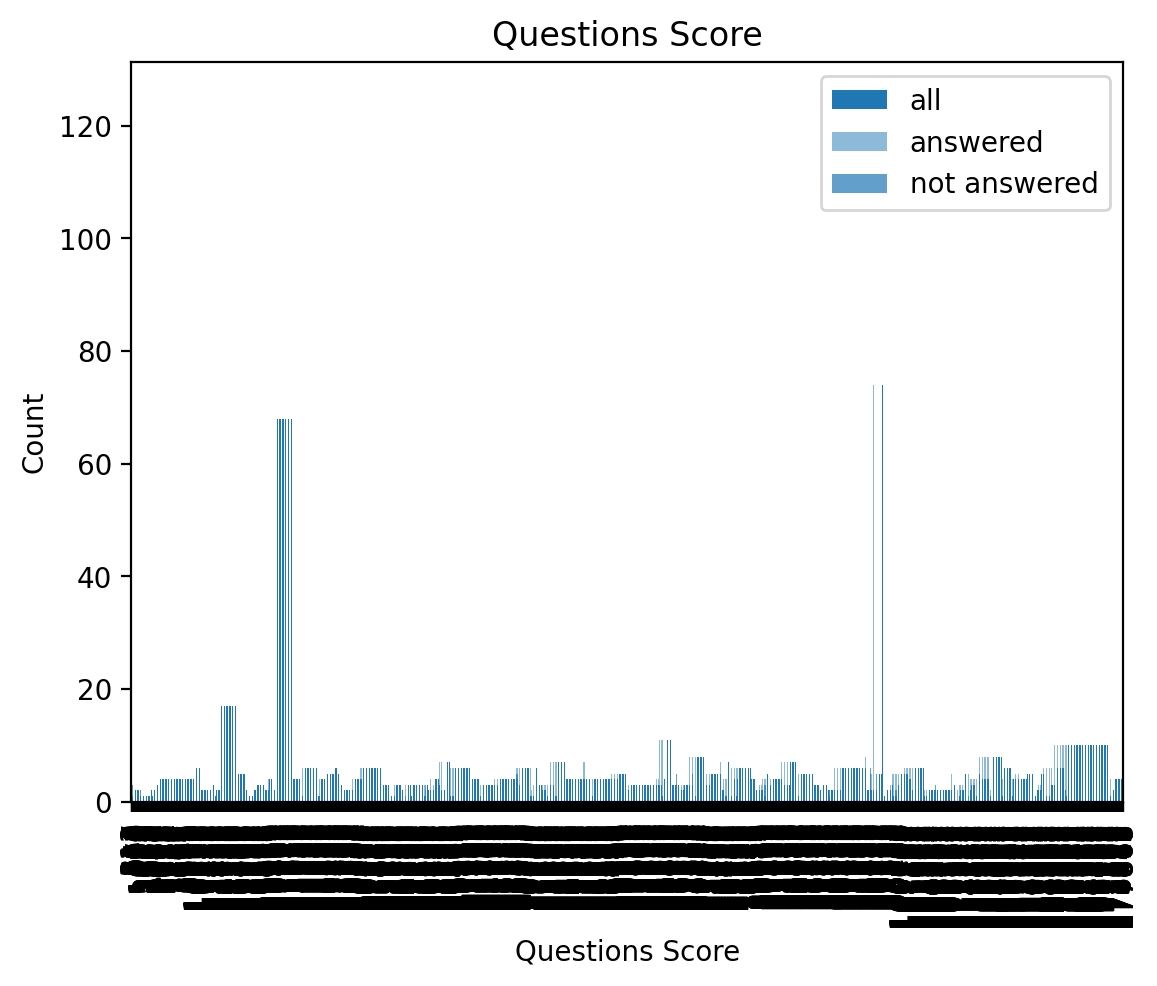

In [5]:
data['questions_score'].plot(kind = 'bar', label="all");
plt.title('Questions Score');
plt.ylabel("Count")
plt.xlabel("Questions Score");

#was answered
data[data['was_answered'] == 1]['questions_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['was_answered'] == 0]['questions_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

#### Graphing the Distribution of the Scores from Answers 

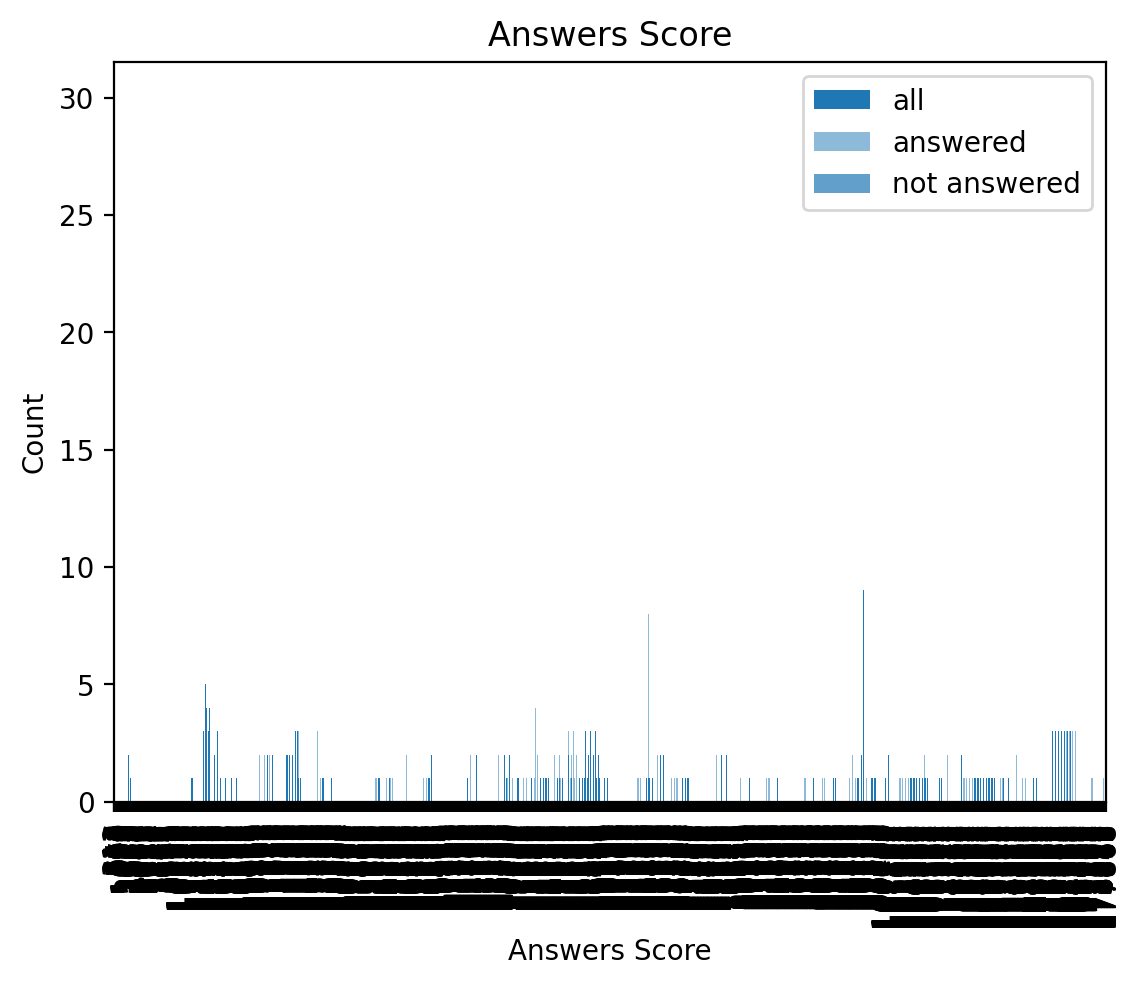

In [7]:
data['answers_score'].plot(kind = 'bar', label="all");
plt.title('Answers Score');
plt.ylabel("Count")
plt.xlabel("Answers Score");

#was answered
data[data['was_answered'] == 1]['answers_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['was_answered'] == 0]['answers_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

#### Checking the distribution of answers that were and were not answered

Text(0, 0.5, 'Count')

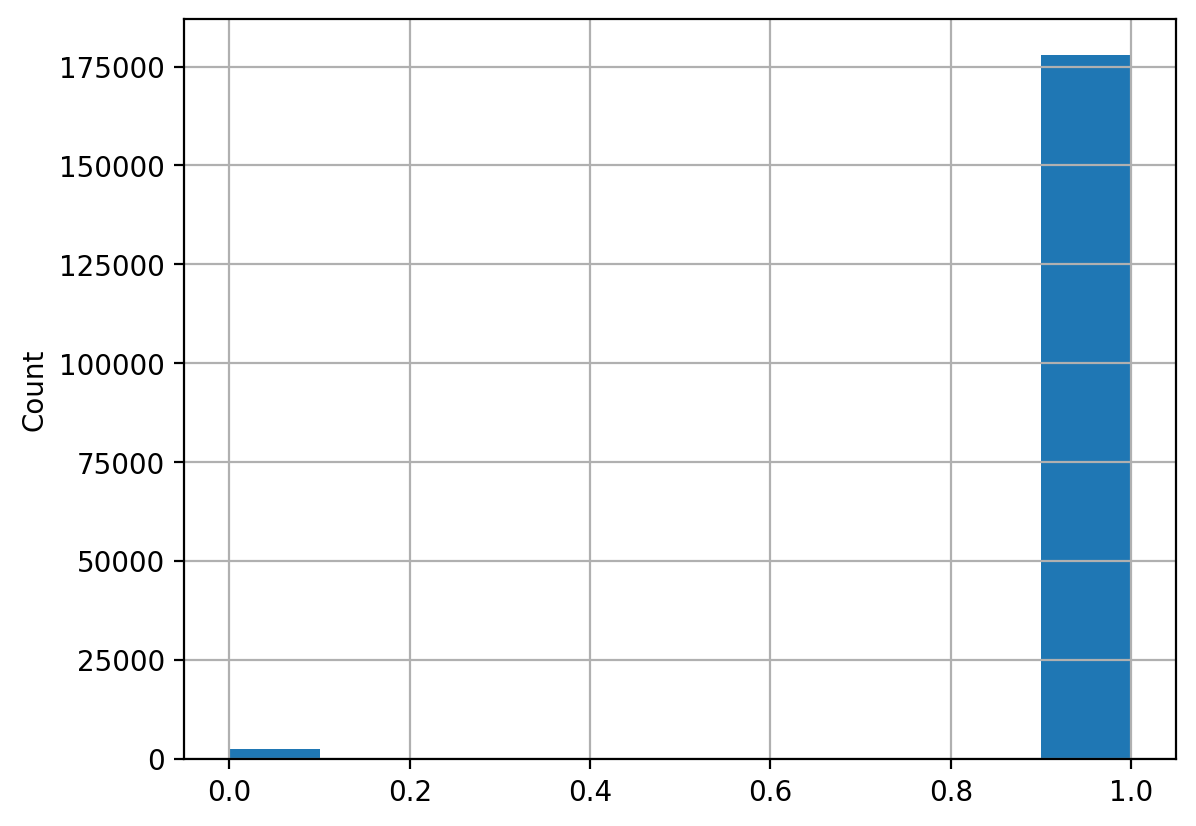

In [15]:
data['was_answered'].hist()
plt.ylabel("Count")
# plt.legend();

In [16]:
data['answers_author_id'].nunique()

10170

In [18]:
data.groupby('answers_author_id').mean(numeric_only = True).sort_values('answers_score', ascending=False).head(1020)

,questions_score,tag_id,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment
answers_author_id,,,,,,,
4dbdd4b99f80446798b3ab477f049285,9.000000,9181.000000,11.000000,1.0,1.000000,0.601900,0.994900
c97347e2441b40a69577cf1627b81a6a,16.875000,10614.125000,10.625000,1.0,1.000000,0.457612,0.988812
a61aa494aed848cc87ba745a24178922,16.428571,15048.000000,9.714286,1.0,1.000000,0.823743,0.973871
1ec14aee9311480681dfa81b0f193de8,15.200000,9751.500000,9.100000,1.0,1.000000,0.180570,0.862150
bdcdf938f015413fb3cb981836ca3dab,24.000000,14096.000000,9.000000,1.0,1.000000,0.757900,0.957800
...,...,...,...,...,...,...,...
dfffd276cafe415e9ab18a0ad5564a9c,10.000000,13367.400000,1.028571,1.0,0.971429,0.516431,0.658269
2796213fb0324530bb206915156dd136,3.777778,15320.027778,1.027778,1.0,1.000000,0.259239,0.897519
26143b4dc57b4d36b8902a14add77e68,29.000000,21116.000000,1.000000,1.0,1.000000,0.757400,0.910000


## Viewing the correlation of the numeric columns to `was_answered`

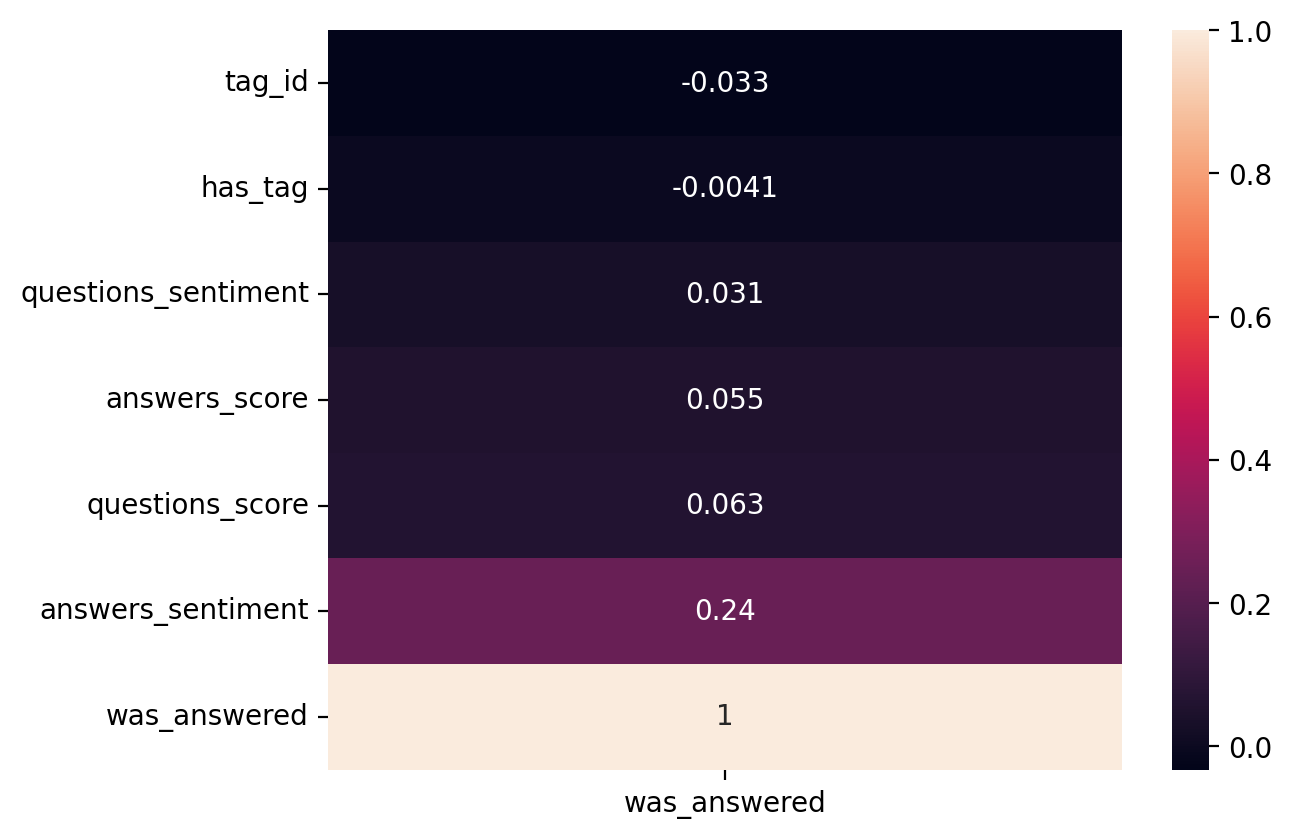

In [20]:
qa_corr = data.corr(numeric_only = True)[['was_answered']].dropna().sort_values('was_answered')

sns.heatmap(qa_corr, annot=True);

---
## Tokenizing

Exploring some other options before exporting cleaned data set

In [4]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\s+', gaps=True)

def tokenizing_function(df, df_col):
    '''
    df: the name of the dataframe
    df_col: The column name formatted as a string 
    i.e. tokenizing_function(data, "answers_body")
    
    This function takes in the dataframe and a column name, 
    concatenates all the cells together into one long string 
    and tokenizes the column using Regex's Tokenizer.
    '''
    

    string = '' # We start off with an empty string
    
    # We use try and except to run this function so that if there is a null cell the function won't break
    
    try:
        for post in df[df_col]:
            string += ' ' + post # we're concatenating all the cells together into one string 
    except:
        pass
    
    return tokenizer.tokenize(string)

### Tokenizing `text_cols`

Since we want to preform NLP and later modeling, we need to tokenizes the text columns. We're saving each as a variable.

From 2a_cleaning_notebook, the columns containing text were:
['questions_title', 'questions_body', 'tag_name', 'answers_body']

In [6]:
answ_tokens = tokenizing_function(data, "answers_body")
ques_tokens = tokenizing_function(data, "questions_body")
ques_title_tokens = tokenizing_function(data, "questions_title")
tag_tokens = tokenizing_function(data, "tag_name")

## Creating a CountVectorizer Function [not used]

In [8]:
cvec = CountVectorizer(stop_words= 'english', min_df=5)

def cvec_function(df_col):
    cvec_matrix = cvec.fit_transform(df_col)

    #Convert to DataFrame
    return pd.DataFrame(cvec_matrix.toarray(),
                          columns=cvec.get_feature_names())
#     return cvec_df # if this doens't work, we can then save pd.Data from as cvec_df and just return that.

In [9]:
data['answers_score'].value_counts()

0.0     127954
1.0      36007
2.0      10334
3.0       3404
4.0       1414
5.0        562
6.0        278
7.0        164
8.0        110
9.0         35
12.0        26
11.0        24
10.0        15
14.0        13
13.0        13
15.0         6
17.0         4
18.0         3
25.0         3
22.0         3
20.0         2
19.0         1
30.0         1
Name: answers_score, dtype: int64

In [10]:
data.tag_name.value_counts().sort_values().tail(20)

engineer             1100
education            1141
healthcare           1144
accounting           1199
teaching             1205
career counseling    1212
computer science     1269
nursing              1270
finance              1440
psychology           1499
science              1551
doctor               1599
none                 1702
college major        1761
technology           1839
medicine             2397
business             2946
engineering          3008
career               4008
college              8332
Name: tag_name, dtype: int64

## Exporting Data

In [11]:
data.to_csv('./Datasets/cleaned_w_sentiment.csv', index=False)

In [15]:
import pickle
# variables = [answ_tokens, ques_title_tokens, ques_tokens, tag_tokens]

fname = '3a_NLP_EDA_' + 'answ_tokens' + '.pkl'
file = open(fname, 'wb')
pickle.dump(answ_tokens, file)
file.close()

fname = '3a_NLP_EDA_' + 'ques_title_tokens' + '.pkl'
file = open(fname, 'wb')
pickle.dump(ques_title_tokens, file)
file.close()

fname = '3a_NLP_EDA_' + 'ques_tokens' + '.pkl'
file = open(fname, 'wb')
pickle.dump(ques_tokens, file)
file.close()

fname = '3a_NLP_EDA_' + 'tag_tokens' + '.pkl'
file = open(fname, 'wb')
pickle.dump(tag_tokens, file)
file.close()

# to read the data again:    
# with open(fname, 'rb') as f:
#     var = pickle.load(f)